<a href="https://colab.research.google.com/github/YusufAbdurrahmann/avian-influenza/blob/main/avian_influenza_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# **Data Import**

In [3]:
df = pd.read_csv("sample_data/avian-influenza.csv")
df.head()

,_id,Scientific_Name,Common_Name,Date,Year,Month,Day,Time,Country,Country_State_County,State,County,Locality,Latitude,Longitude,Parent_Species,target_H5_HPAI
0,1,Acrocephalus scirpaceus,Eurasian Reed Warbler,2015-09-15T00:00:00,2015,9,15,1100,Ireland,IE-C-GY,Connaught,Galway,Inishmore (Inis M�r),53.1291,-9.7507,Acrocephalus scirpaceus,0
1,2,Acrocephalus scirpaceus,Eurasian Reed Warbler,2015-09-15T00:00:00,2015,9,15,1100,Ireland,IE-C-GY,Connaught,Galway,Inishmore (Inis M�r),53.1291,-9.7507,Acrocephalus scirpaceus,0
2,3,Limosa haemastica,Hudsonian Godwit,2015-09-15T00:00:00,2015,9,15,1100,Ireland,IE-C-GY,Connaught,Galway,Inishmore (Inis M�r),53.1291,-9.7507,Limosa haemastica,0
3,4,Limosa haemastica,Hudsonian Godwit,2015-09-15T00:00:00,2015,9,15,1100,Ireland,IE-C-GY,Connaught,Galway,Inishmore (Inis M�r),53.1291,-9.7507,Limosa haemastica,0
4,5,Limosa haemastica,Hudsonian Godwit,2015-09-15T00:00:00,2015,9,15,1100,Ireland,IE-C-GY,Connaught,Galway,Inishmore (Inis M�r),53.1291,-9.7507,Limosa haemastica,0


# **Data Understanding**

In [4]:
print(df.shape)

(16304, 17)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16304 entries, 0 to 16303
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _id                   16304 non-null  int64  
 1   Scientific_Name       16304 non-null  object 
 2   Common_Name           16304 non-null  object 
 3   Date                  16304 non-null  object 
 4   Year                  16304 non-null  int64  
 5   Month                 16304 non-null  int64  
 6   Day                   16304 non-null  int64  
 7   Time                  16304 non-null  int64  
 8   Country               16304 non-null  object 
 9   Country_State_County  16304 non-null  object 
 10  State                 16304 non-null  object 
 11  County                16175 non-null  object 
 12  Locality              16304 non-null  object 
 13  Latitude              16304 non-null  float64
 14  Longitude             16304 non-null  float64
 15  Parent_Species     

In [6]:
df.describe()

,_id,Year,Month,Day,Time,Latitude,Longitude,target_H5_HPAI
count,16304.00000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000
mean,8152.50000,2017.014046,6.711175,15.961298,1039.476877,53.029498,-7.681590,0.158550
std,4706.70373,2.449262,2.982981,8.453874,478.590101,0.749999,1.585872,0.365267
min,1.00000,1980.000000,1.000000,1.000000,0.000000,49.733900,-15.345800,0.000000
25%,4076.75000,2016.000000,5.000000,9.000000,805.000000,52.520000,-9.075600,0.000000
50%,8152.50000,2018.000000,7.000000,16.000000,1100.000000,53.269000,-6.901800,0.000000
75%,12228.25000,2019.000000,9.000000,23.000000,1400.000000,53.388900,-6.197400,0.000000
max,16304.00000,2020.000000,12.000000,31.000000,2114.000000,55.370600,-5.996000,1.000000


# **Data Cleaning**

In [7]:
df.isnull().sum()

,0
_id,0
Scientific_Name,0
Common_Name,0
Date,0
Year,0
Month,0
Day,0
Time,0
Country,0
Country_State_County,0


In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

0

# **Explanatory Data Analys (EDA)**

Text(0, 0.5, 'Frekuensi')

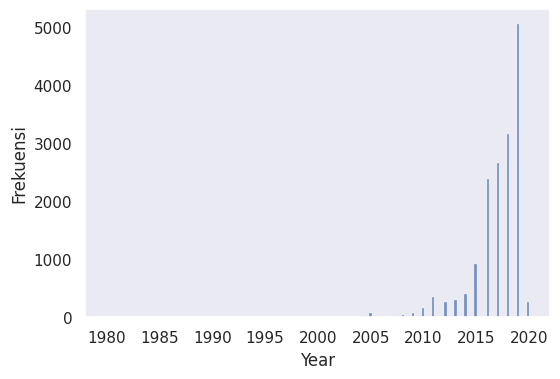

In [13]:
plt.figure(figsize=(6,4))
sns.set_theme(style="dark")
sns.histplot(data = df, x = "Year")
plt.ylabel("Frekuensi")

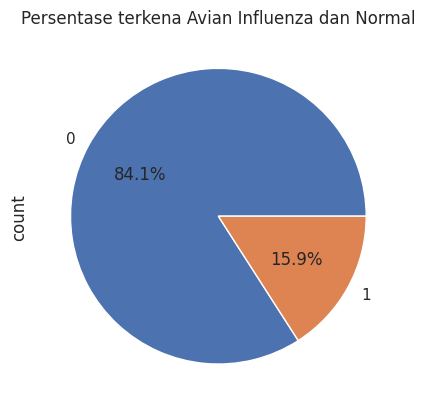

In [17]:
df["target_H5_HPAI"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Persentase terkena Avian Influenza dan Normal")
plt.show()

# **Data Preprocessing**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16175 entries, 0 to 16303
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _id                   16175 non-null  int64  
 1   Scientific_Name       16175 non-null  object 
 2   Common_Name           16175 non-null  object 
 3   Date                  16175 non-null  object 
 4   Year                  16175 non-null  int64  
 5   Month                 16175 non-null  int64  
 6   Day                   16175 non-null  int64  
 7   Time                  16175 non-null  int64  
 8   Country               16175 non-null  object 
 9   Country_State_County  16175 non-null  object 
 10  State                 16175 non-null  object 
 11  County                16175 non-null  object 
 12  Locality              16175 non-null  object 
 13  Latitude              16175 non-null  float64
 14  Longitude             16175 non-null  float64
 15  Parent_Species        16

In [25]:
sn = LabelEncoder()
cn = LabelEncoder()
dt = LabelEncoder()
ct = LabelEncoder()
sc = LabelEncoder()
st = LabelEncoder()
cy = LabelEncoder()
ly = LabelEncoder()
ps = LabelEncoder()

df["Scientific_Name"] = sn.fit_transform(df["Scientific_Name"])
df["Common_Name"] = cn.fit_transform(df["Common_Name"])
df["Date"] = dt.fit_transform(df["Date"])
df["Country"] = ct.fit_transform(df["Country"])
df["Country_State_County"] = sc.fit_transform(df["Country_State_County"])
df["State"] = st.fit_transform(df["State"])
df["County"] = cy.fit_transform(df["County"])
df["Locality"] = ly.fit_transform(df["Locality"])
df["Parent_Species"] = ps.fit_transform(df["Parent_Species"])

In [28]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [27]:
X = df.drop(columns = ["target_H5_HPAI"])
y = df["target_H5_HPAI"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42,)

# **Modelling**

In [40]:
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

print(classification_report(y_pred, y_test, zero_division=1))
print(accuracy)
print("Accuracy : {:.2f}%".format(accuracy*100))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3235
           1       0.00      1.00      0.00         0

    accuracy                           0.84      3235
   macro avg       0.50      0.92      0.46      3235
weighted avg       1.00      0.84      0.91      3235

0.8432766615146832
Accuracy : 84.33%
